###  Data Overview
The dataset contains 5-minute interval production data for two solar plants, spanning full days.  
Some columns are not populated and are dropped. The following key fields are retained for further analysis and visualisation:

- Plant identifier (anonymised)
- Timestamp (5-minute resolution)
- Real-time power output (kW)
- Installed plant capacity (kWp)
- Daily and cumulative yield (kWh)
- Equivalent daily full-load hours (h)

Only two days are shown for demonstration. Both plant names and installed capacity values are anonymised.

In [82]:
import os
os.chdir("..")
from global_parameters import EXPLORATION_DATA_PATHS, PLANT_NAME_MAPPING
import pandas as pd

dfs = [pd.read_csv(path, header=0, skiprows=1) for path in EXPLORATION_DATA_PATHS]
df = pd.concat(dfs, ignore_index=True)


In [83]:
df['Plant name'] = df['Plant name'].apply(lambda x: PLANT_NAME_MAPPING.get(x, x))
df['Installed Power(kWp)'] = 10.0
df

,Plant name,Time,Installed Power(kWp),Real-time power(kW),Daily yield(kWh),Total yield(kWh),Daily equivalent hours(h),Daily consumption(kWh),Total power consumption(kWh),Daily feed-in energy(kWh),Total feed-in energy(kWh),Energy purchased today(kWh),Total purchased energy(kWh),Daily load consumption(kWh)
0,Plant B,2025-01-01 00:00,10.0,0.0,0.0,17559.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Plant B,2025-01-01 00:05,10.0,0.0,0.0,17559.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Plant B,2025-01-01 00:10,10.0,0.0,0.0,17559.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Plant B,2025-01-01 00:15,10.0,0.0,0.0,17559.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Plant B,2025-01-01 00:20,10.0,0.0,0.0,17559.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,Plant A,2025-01-02 23:35,10.0,0.0,3.0,17431.3,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1148,Plant A,2025-01-02 23:40,10.0,0.0,3.0,17431.3,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149,Plant A,2025-01-02 23:45,10.0,0.0,3.0,17431.3,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150,Plant A,2025-01-02 23:50,10.0,0.0,3.0,17431.3,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Several columns are provided by the solar system provider but are not populated with values. 
Deleting: 
- Daily consumption(kWh)	
- Total power consumption(kWh)	
- Daily feed-in energy(kWh)	
- Total feed-in energy(kWh)	
- Energy purchased today(kWh)	
- Total purchased energy(kWh)	
- Daily load consumption(kWh)

Also renaming remaining columns.

In [84]:
df = df.dropna(axis=1, how='all')
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'Plant name': 'plant',
    'Time': 'timestamp',
    'Real-time power(kW)': 'power_kw',
    'Installed Power(kWp)': 'installed_kwp',
    'Daily yield(kWh)': 'daily_yield_kwh',
    'Total yield(kWh)': 'total_yield_kwh',
    'Daily equivalent hours(h)': 'eq_hours',
})
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M")
df

,plant,timestamp,installed_kwp,power_kw,daily_yield_kwh,total_yield_kwh,eq_hours
0,Plant B,2025-01-01 00:00:00,10.0,0.0,0.0,17559.2,0.0
1,Plant B,2025-01-01 00:05:00,10.0,0.0,0.0,17559.2,0.0
2,Plant B,2025-01-01 00:10:00,10.0,0.0,0.0,17559.2,0.0
3,Plant B,2025-01-01 00:15:00,10.0,0.0,0.0,17559.2,0.0
4,Plant B,2025-01-01 00:20:00,10.0,0.0,0.0,17559.2,0.0
...,...,...,...,...,...,...,...
1147,Plant A,2025-01-02 23:35:00,10.0,0.0,3.0,17431.3,0.2
1148,Plant A,2025-01-02 23:40:00,10.0,0.0,3.0,17431.3,0.2
1149,Plant A,2025-01-02 23:45:00,10.0,0.0,3.0,17431.3,0.2
1150,Plant A,2025-01-02 23:50:00,10.0,0.0,3.0,17431.3,0.2


Some base stats in the following.

In [85]:
df.describe()

,timestamp,installed_kwp,power_kw,daily_yield_kwh,total_yield_kwh,eq_hours
count,1152,1152.0,1152.000000,1152.000000,1152.000000,1152.000000
mean,2025-01-01 23:57:30,10.0,0.184123,2.130729,17495.855729,0.142109
min,2025-01-01 00:00:00,10.0,0.000000,0.000000,17422.300000,0.000000
25%,2025-01-01 11:58:45,10.0,0.000000,0.000000,17428.300000,0.000000
50%,2025-01-01 23:57:30,10.0,0.000000,1.300000,17495.250000,0.090000
75%,2025-01-02 11:56:15,10.0,0.222500,3.000000,17565.100000,0.200000
max,2025-01-02 23:55:00,10.0,1.510000,6.000000,17567.900000,0.400000
std,NaN,0.0,0.353095,2.306782,68.478983,0.153428


In [86]:
print("Date range:", df['timestamp'].min(), "→", df['timestamp'].max())
print("Rows:", len(df))
print("Rows per day:", int(len(df)/2))
print("\nPlants:\n", df['plant'].value_counts())
print("\nMissing values:\n", df.isna().sum())

Date range: 2025-01-01 00:00:00 → 2025-01-02 23:55:00
Rows: 1152
Rows per day: 576

Plants:
 plant
Plant B    576
Plant A    576
Name: count, dtype: int64

Missing values:
 plant              0
timestamp          0
installed_kwp      0
power_kw           0
daily_yield_kwh    0
total_yield_kwh    0
eq_hours           0
dtype: int64


In [87]:
df.groupby('plant')['power_kw'].describe()

,count,mean,std,min,25%,50%,75%,max
plant,,,,,,,,
Plant A,576.0,0.186719,0.358626,0.0,0.0,0.0,0.2250,1.51
Plant B,576.0,0.181528,0.347768,0.0,0.0,0.0,0.2225,1.44


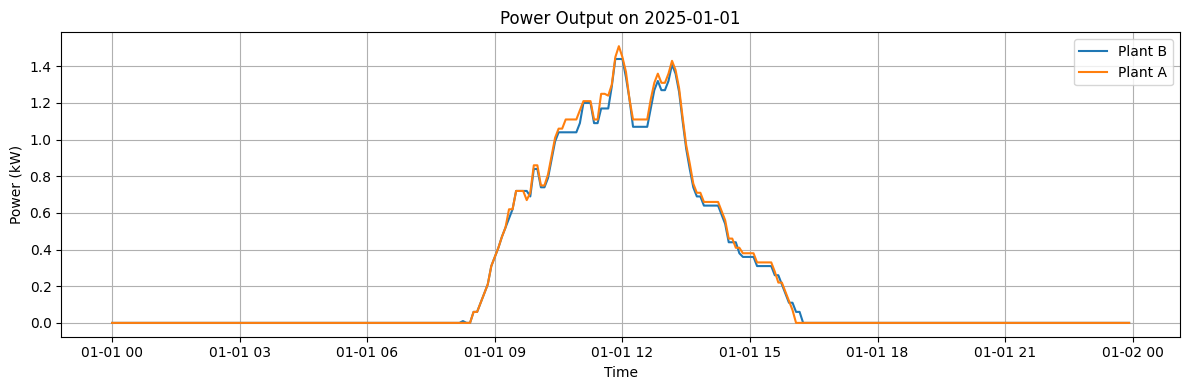

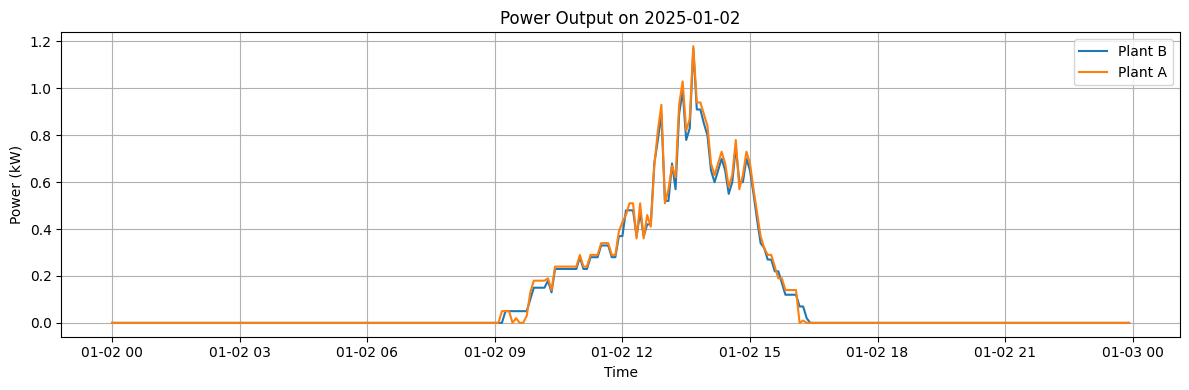

In [88]:
import matplotlib.pyplot as plt

def plot(df_day):
    plt.figure(figsize=(12, 4))
    for plant in df_day['plant'].unique():
        plant_data = df_day[df_day['plant'] == plant]
        plt.plot(plant_data['timestamp'], plant_data['power_kw'], label=plant)

    plt.title(f"Power Output on {day}")
    plt.xlabel("Time")
    plt.ylabel("Power (kW)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

df['date'] = df['timestamp'].apply(lambda x: x.date())
for day in df['date'].unique():
    df_day = df[df['timestamp'].dt.date == day]
    plot(df_day)

### Summary & Next Steps

The dataset appears clean and complete, with no missing values in key fields.  
As expected for Northern Hemisphere winter days, production values are low, peaking around midday.

**Next steps for preprocessing:**
- Standardise rename and manage columns
- Standardise timestamps to consistent timezone
- Aggregate to daily/monthly granularity
- Later: join with external forecast or weather data
